In [1]:
import pandas as pd

# Open the zip into the dataset folder if this does not work for you

df = pd.read_csv("dataset/Impact_of_Remote_Work_on_Mental_Health.csv")
df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


# Preprocessing


In [2]:
from sklearn.preprocessing import LabelEncoder

# Drop selected features
columns_drop = ['Employee_ID', 'Region', 'Industry','Age','Productivity_Change']
df = df.drop(columns_drop, axis=1, errors='ignore')

# Fill null values
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].fillna('Not Specified')
df['Physical_Activity'] = df['Physical_Activity'].fillna('None')


# Encode target variables
target_enc = LabelEncoder().fit(df['Mental_Health_Condition'].unique())
df['Mental_Health_Condition'] = target_enc.transform(df['Mental_Health_Condition'])
targets_df = df['Mental_Health_Condition']
targets = target_enc.inverse_transform(df['Mental_Health_Condition'])

df = df.drop('Mental_Health_Condition', axis=1)

targets

array(['Depression', 'Anxiety', 'Anxiety', ..., 'Burnout',
       'Not Specified', 'Depression'], dtype=object)

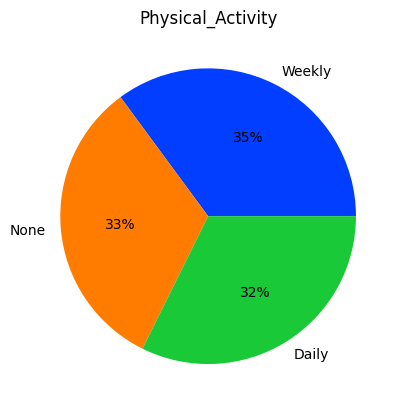

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_pie_chart(features, data):
    for feature in features:
        keys = data[feature].unique()
        tempData = data[feature].value_counts(dropna=False)

        # define Seaborn color palette to use 
        palette_color = sns.color_palette('bright') 

        # plotting data on chart 
        plt.pie(tempData, labels=keys, colors=palette_color, autopct='%.0f%%') 
        plt.title(feature)
    
        # displaying chart 
        plt.show() 

generate_pie_chart(['Physical_Activity'], df)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# for column in df.columns:
#     contingency_table = pd.crosstab(df[column], targets)
#     sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
#     plt.title(f'{column} vs Mental Health Condition')
#     plt.show()

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Example usage
max_corr = 0
for feature in df.columns:
    if feature == 'Mental_Health_Condition':
        continue
    cramers_v_value = cramers_v(df[feature], targets_df)
    max_corr = max(max_corr, cramers_v_value)
    print(f"Cramér's V {feature}: {cramers_v_value}")

print(f"Max: {max_corr}")

Cramér's V Gender: 0.026155669689276708
Cramér's V Job_Role: 0.058470064854098974
Cramér's V Years_of_Experience: 0.07944372697263816
Cramér's V Work_Location: 0.021403145130194947
Cramér's V Hours_Worked_Per_Week: 0.08683642045141256
Cramér's V Number_of_Virtual_Meetings: 0.06213103731750508
Cramér's V Work_Life_Balance_Rating: 0.025291589796847026
Cramér's V Stress_Level: 0.01719463891560119
Cramér's V Access_to_Mental_Health_Resources: 0.025023038462892916
Cramér's V Social_Isolation_Rating: 0.02167614311125698
Cramér's V Satisfaction_with_Remote_Work: 0.019007889258483044
Cramér's V Company_Support_for_Remote_Work: 0.03447683488947153
Cramér's V Physical_Activity: 0.027959671459359174
Cramér's V Sleep_Quality: 0.025974665940680857
Max: 0.08683642045141256


# One Hot Encoding

In [5]:
from sklearn.preprocessing import OneHotEncoder

# Columns to be encoded via one hot encoding
columns = ['Gender', 'Job_Role', 'Work_Location', 'Physical_Activity',]
df_encoded = pd.get_dummies(df, columns=columns, drop_first=True)

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[columns])

one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(columns))

df_encoded = pd.concat([df.drop(columns, axis=1), one_hot_df], axis=1)

In [6]:
# Preprocessing 

# manual mapping
columns = ['Stress_Level', 'Access_to_Mental_Health_Resources', 'Satisfaction_with_Remote_Work']

mappings = {
    'Stress_Level': {
        'Low': 1,
        'Medium': 2,
        'High': 3,
    },
    'Access_to_Mental_Health_Resources': {
        'No': 0,
        'Yes': 1,
    },
    'Satisfaction_with_Remote_Work': {
        'Unsatisfied': -1,
        'Neutral': 0,
        'Satisfied': 1,
    },
    'Sleep_Quality': {
        'Good': 1,
        'Average':0,
        'Poor': -1,
    },
}

# Map values to dataframe
for column, mapping in mappings.items():
    if column in df_encoded.columns:
        df_encoded[column] = df_encoded[column].map(mapping)

In [7]:
# Minmax scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns = ['Years_of_Experience', 'Hours_Worked_Per_Week', 
           'Number_of_Virtual_Meetings', ]


df_encoded[columns] = scaler.fit_transform(df[columns])
df_encoded

,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Access_to_Mental_Health_Resources,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Sleep_Quality,...,Job_Role_Marketing,Job_Role_Project Manager,Job_Role_Sales,Job_Role_Software Engineer,Work_Location_Hybrid,Work_Location_Onsite,Work_Location_Remote,Physical_Activity_Daily,Physical_Activity_None,Physical_Activity_Weekly
0,0.352941,0.675,0.466667,2,2,0,1,-1,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.058824,0.800,0.266667,1,2,0,3,1,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.617647,0.650,0.733333,5,2,0,4,-1,5,-1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.558824,0.300,0.533333,4,3,1,3,-1,3,-1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.911765,0.375,0.800000,2,3,1,3,-1,3,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.088235,0.100,0.133333,5,3,1,4,0,1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4996,0.764706,0.700,1.000000,1,1,1,1,1,1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4997,0.588235,0.350,0.066667,4,3,0,3,1,1,-1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4998,0.735294,0.950,0.000000,5,1,1,3,-1,4,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# SVM Model

In [8]:
# SVM models
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

# Reusable function to display the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)

    # Create the plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Depression', 'Anxiety', 'Burnout', 'No Condition'], yticklabels=['Depression', 'Anxiety', 'Burnout', 'No Condition'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.grid(False)
    plt.show()

In [9]:
linear_param_grid = {
    'C': [0.1, 1, 10, 100],
    'decision_function_shape': ['ovo', 'ovr'],
    'kernel': ['linear'],
}

poly_param_grid = {
    'kernel': ['poly'],
    'C': [0.1, 1, 10, 100],
    'decision_function_shape': ['ovo', 'ovr'],
    # 'degree': [2, 3],
    'degree': [2, 3, 4, 5],  # Degree of the polynomial
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
    'coef0': [0, 0.1, 1, 10]  # Independent term in the kernel function
}

rbf_param_grid = {
    'kernel': ['rbf'],
    'decision_function_shape': ['ovo', 'ovr'],
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10]  # Kernel coefficient
}

sigmoid_param_grid = {
    'kernel': ['sigmoid'],
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
    'coef0': [0, 0.1, 1, 10],  # Independent term in the kernel function
    'decision_function_shape': ['ovo', 'ovr'],
}

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, targets_df, stratify=targets_df, train_size=0.8, random_state=42, shuffle=True)

In [11]:
param_grids = {
    'linear': linear_param_grid,
    # 'poly': poly_param_grid, DO NOT UNCOMMENT THIS, IT WILL INCREASE TRAINING TIME BY AN HOUR
    'rbf': rbf_param_grid,
    'sigmoid': sigmoid_param_grid,
}

results = {}
for kernel, param_grid in param_grids.items():
    print(f'Currently on {kernel} kernel')

    grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
    grid_search.fit(X=X_train, y=y_train)
    
    results[kernel] = {'best_params': grid_search.best_params_, 'best_score': grid_search.best_score_}
    
    print(f'Best accuracy score found: {grid_search.best_score_}')

'''
Kernel: linear
Best Params: {'C': 10, 'decision_function_shape': 'ovo', 'kernel': 'linear'}
Best Accuracy Score: 0.27825
Kernel: rbf
Best Params: {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy Score: 0.26525
Kernel: sigmoid
Best Params: {'C': 0.1, 'coef0': 0, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'sigmoid'}
Best Accuracy Score: 0.25649999999999995
'''

for kernel, metrics in results.items():
    print(f"Kernel: {kernel}")
    print(f"Best Params: {metrics['best_params']}")
    print(f"Best Accuracy Score: {metrics['best_score']}")

Currently on linear kernel
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best accuracy score found: 0.27825
Currently on rbf kernel
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best accuracy score found: 0.26525
Currently on sigmoid kernel
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best accuracy score found: 0.25649999999999995
Kernel: linear
Best Params: {'C': 10, 'decision_function_shape': 'ovo', 'kernel': 'linear'}
Best Accuracy Score: 0.27825
Kernel: rbf
Best Params: {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy Score: 0.26525
Kernel: sigmoid
Best Params: {'C': 0.1, 'coef0': 0, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'sigmoid'}
Best Accuracy Score: 0.25649999999999995


Kernel: linear


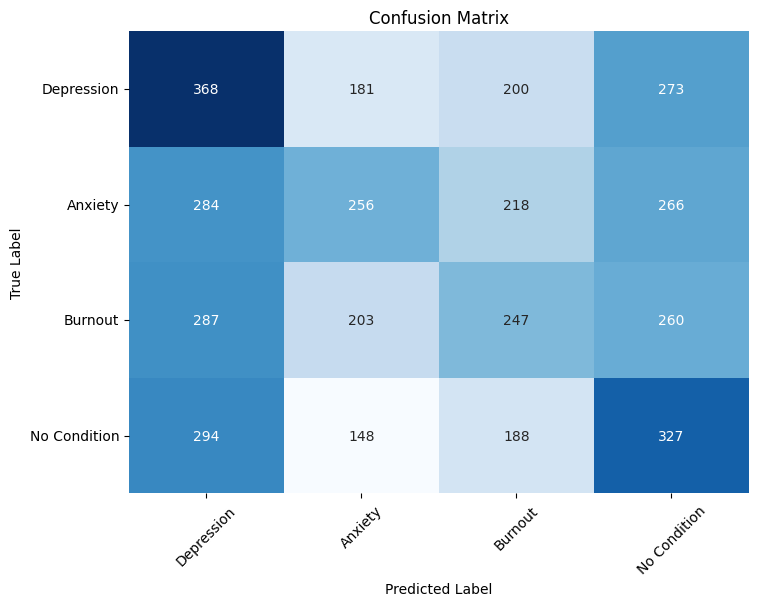

              precision    recall  f1-score   support

           0       0.30      0.36      0.33      1022
           1       0.32      0.25      0.28      1024
           2       0.29      0.25      0.27       997
           3       0.29      0.34      0.31       957

    accuracy                           0.30      4000
   macro avg       0.30      0.30      0.30      4000
weighted avg       0.30      0.30      0.30      4000

Kernel: rbf


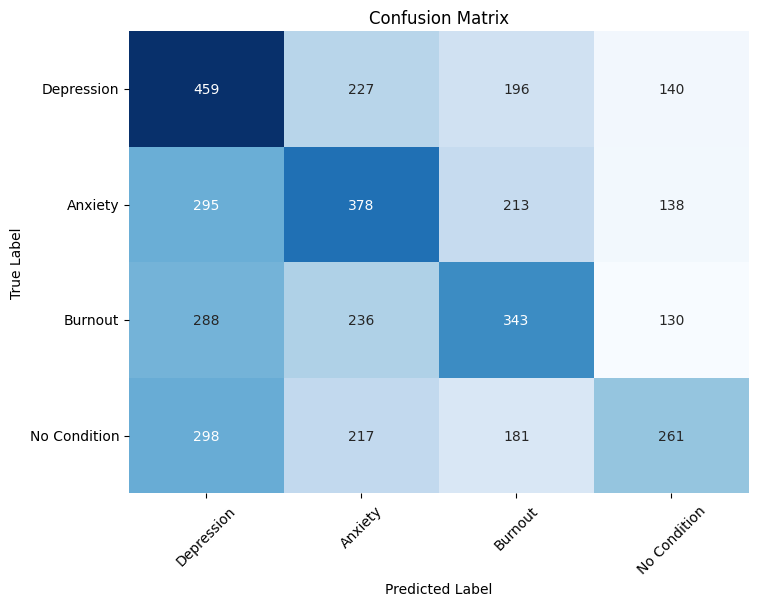

              precision    recall  f1-score   support

           0       0.34      0.45      0.39      1022
           1       0.36      0.37      0.36      1024
           2       0.37      0.34      0.36       997
           3       0.39      0.27      0.32       957

    accuracy                           0.36      4000
   macro avg       0.36      0.36      0.36      4000
weighted avg       0.36      0.36      0.36      4000

Kernel: sigmoid


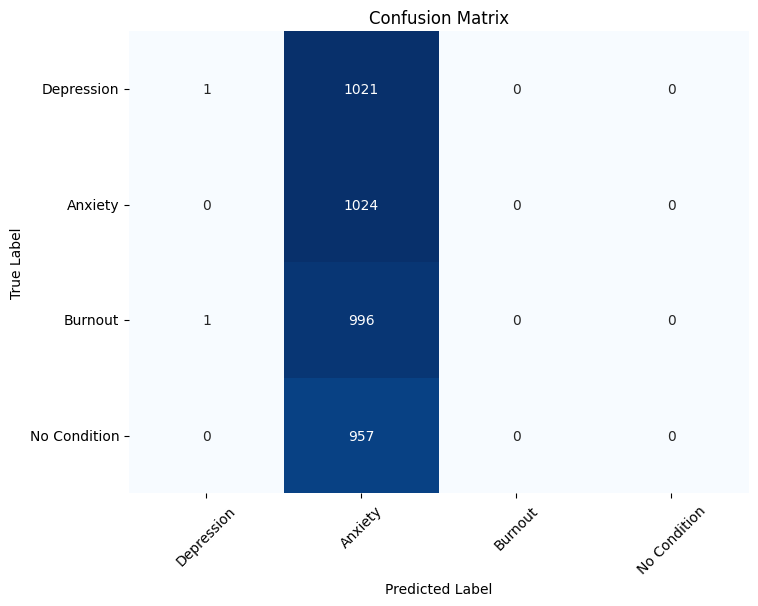

              precision    recall  f1-score   support

           0       0.50      0.00      0.00      1022
           1       0.26      1.00      0.41      1024
           2       0.00      0.00      0.00       997
           3       0.00      0.00      0.00       957

    accuracy                           0.26      4000
   macro avg       0.19      0.25      0.10      4000
weighted avg       0.19      0.26      0.10      4000



c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Testing on train set
for kernel, metrics in results.items():
    print(f"Kernel: {kernel}")

    best_model = SVC(**metrics['best_params'])
    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_train)

    plot_confusion_matrix(y_true=y_train, y_pred=y_pred)
    print(classification_report(y_true=y_train, y_pred=y_pred))

Kernel: linear


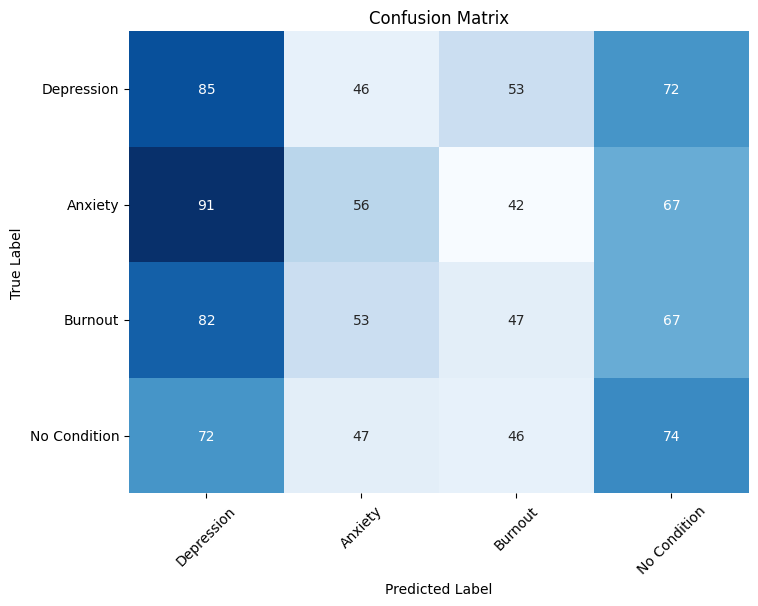

              precision    recall  f1-score   support

           0       0.26      0.33      0.29       256
           1       0.28      0.22      0.24       256
           2       0.25      0.19      0.22       249
           3       0.26      0.31      0.29       239

    accuracy                           0.26      1000
   macro avg       0.26      0.26      0.26      1000
weighted avg       0.26      0.26      0.26      1000

Kernel: rbf


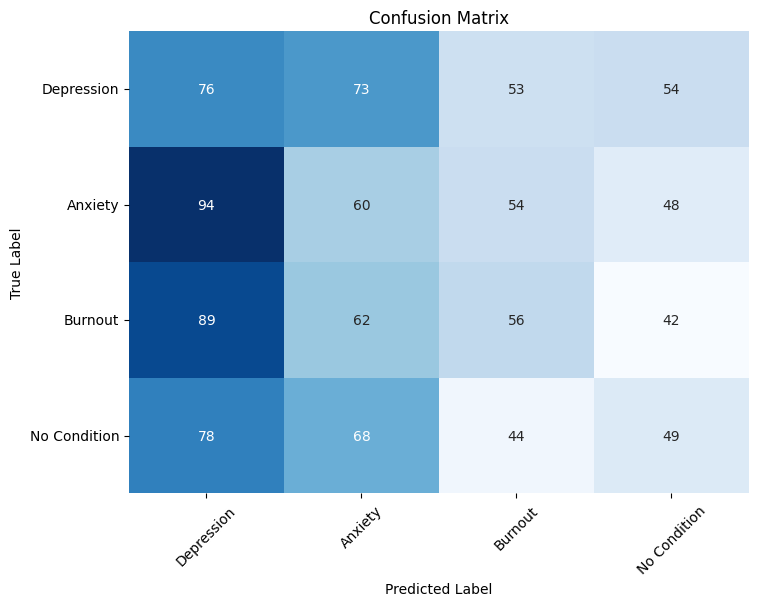

              precision    recall  f1-score   support

           0       0.23      0.30      0.26       256
           1       0.23      0.23      0.23       256
           2       0.27      0.22      0.25       249
           3       0.25      0.21      0.23       239

    accuracy                           0.24      1000
   macro avg       0.24      0.24      0.24      1000
weighted avg       0.24      0.24      0.24      1000

Kernel: sigmoid


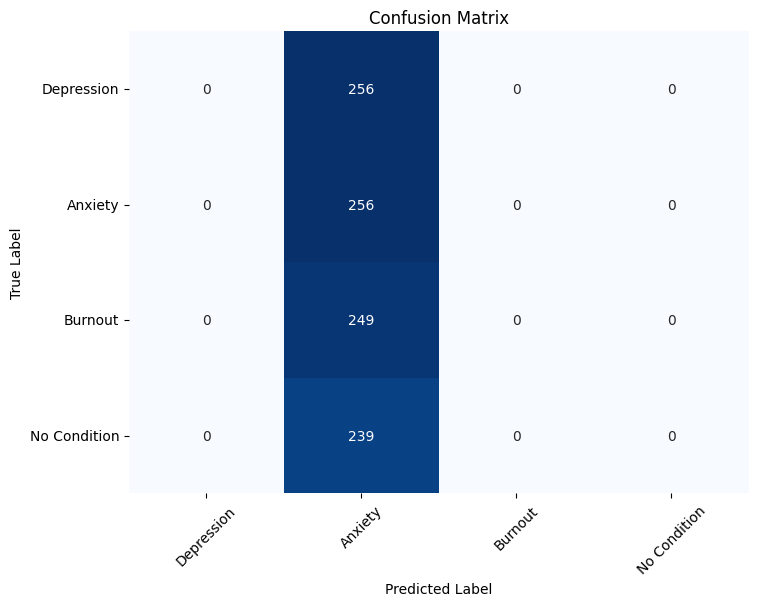

c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       256
           1       0.26      1.00      0.41       256
           2       0.00      0.00      0.00       249
           3       0.00      0.00      0.00       239

    accuracy                           0.26      1000
   macro avg       0.06      0.25      0.10      1000
weighted avg       0.07      0.26      0.10      1000



In [ ]:
# Testing on test set
test_results = {}
for kernel, metrics in results.items():
    print(f"Kernel: {kernel}")

    best_model = SVC(**metrics['best_params'])
    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(classification_report(y_true=y_test, y_pred=y_pred))
    test_results[kernel] = best_model.score(X_test, y_test)

sorted_test_results = sorted(test_results, key=lambda item: item[1])

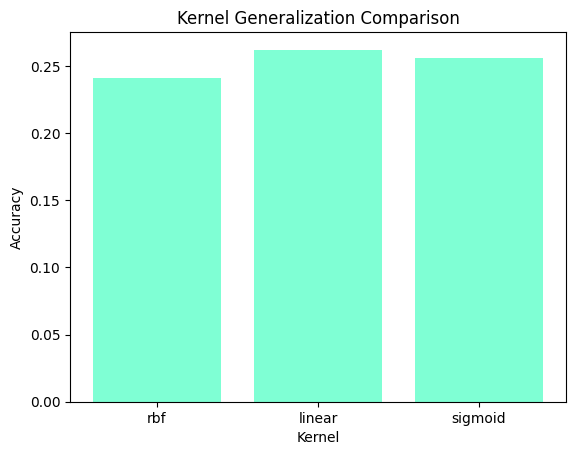

In [ ]:
import matplotlib.pyplot as plt

# Visualize the test_results
kernels = sorted_test_results
score_results = [test_results[kernel] for kernel in kernels]

plt.bar(kernels, score_results, color='aquamarine')
plt.title('Kernel Generalization Comparison')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.show()

# Add Your Models Below Here and use the preprocessed data from above
Use the following: X_train, X_test, y_train, y_test